<h4 style="text-align: center;">동태적 공통인자모형 (Dynamic Common Factor Model)</h4>

$\ \  \  \  \  $ \* $Y_t = (y_{1t},y_{2t},..,y_{Nt})$는 시점 $t$의 안정 시계열 벡터

$\ \  \  \  \  $ \* $G_t=$ Global 공통인자 (예: 글로벌 요인)

$\ \  \  \  \  $ \* $R_t=$ Regional 공통인자 (예: 선진국 요인)

$\ \  \  \  \  $ \* $L_t=$ Local 공통인자 (예: 선진국 중 소규모 개방경제 요인)

$\ \  \  \  \  $ \* $E_t = (e_{1t},e_{2t},..,e_{Nt}) = $ 변수 특유(variable-specific) 인자 (예: 한국 특유 요인) 


1. 측정식

$\ \  \  \  \  $ \*  각 변수는 $G_t$와 $e_{it}$에 의해서 영향을 받음

$$y_{it} = G_t \times \beta_{it} + e_it $$



$\ \  \  \  \  $ \*  $Y_t$ 중 일부는 $R_t$의 영향을 받음

$$y_{it} = G_t \times \beta_{it} + R_t \times \gamma_{it} + e_it $$


$\ \  \  \  \  $ \* $R_t$의 영향을 받는 변수 중 일부는 추가로 $L_t$의 영향을 받음 

$$y_{it} = G_t \times \beta_{it} + R_t \times \gamma_{it} + L_t \times \lambda_{it} + e_it $$

 
2. 전환식

$\ \  \  \  \  $ \* $G_t$, $R_t$, $L_t$, $E_t$는 상호독립이고 모두 안정적인 AR(1) 또는 AR(0) 과정을 따름

$\ \  \  \  \  $ \* 모든 오차항은 정규분포를 가정


3. 고려할 수 있는 모형의 종류는 세 가지입니다.

$\ \  \  \  \  $ (1) 글로벌 요인만 있는 경우

$\ \  \  \  \  $ (2) 글로벌과 Regional 요인이 있는 경우

$\ \  \  \  \  $ (3) 글로벌, Regional, Local 요인이 있는 경우

이제 실제자료를 이용해서 추정을 시작합니다!!

<단계 1> 기본 모듈을 불러옵니다. 수정없이 실행하세요.

In [1]:
import numpy as np
import pandas as pd

<단계 2> BOKpy 모듈을 불러옵니다. 수정없이 실행하세요.

In [2]:
import bok_python as bp 

<단계 3> 자료를 불러옵니다.

In [3]:
# 자료 불러오기
data0 = pd.read_excel('./test_data/Data_BayesEcon.xlsx',sheet_name='HP_Data')
data1 = np.asmatrix(data0)
Data = np.asmatrix(data1[6:, 1:], float)
# Data는 T by N 행렬입니다. T = 표본 기간의 크기, N = 변수의 수
# 데이터: 지역별 전년동기대비 집값 상승률(월별, %, 출처:ECOS)
# 서울,경기,인천,부산,대구,광주,울산 (총 7개 변수)
# 순서대로 변수0, 변수1, .., 변수6에 해당합니다.
# 이 예시에서 N = 7입니다.

<단계 4> Regional 요인과 Local 요인의 영향을 받는 변수 인덱스를 정의합니다.

In [4]:
# N개중 0, 1, 2번째 변수는 수도권 요인(Regional common effect)
Regional_countries = [0, 1, 2]  # 수도권 요인
# 만약 Regional common effect를 가정하지 않는다면 Regional_countries = [ ] 로 설정하세요.
# Regional_countries가 empty([ ])면 Local_countries도 자동으로 empty로 설정됩니다.

# 수도권 요인의 영향을 받는 변수 중 변수1(경기), 변수2(인천)는 서울을 제외한 수도권 요인의 영향을 받는다고 가정 
Local_countries = [1, 2]  # 서울 제외 수도권 요인
# Local_countries는 반드시 Regional_countries의 부분 집합이어야 합니다
# 만약 Local common effect를 가정하지 않는다면 Local_countries = [ ] 로 설정하세요.

<단계 5> 요인들의 시차를 선택합니다.

In [5]:
P = 1 # 각 인자의 AR order
# P는 0 또는 1 로 설정
# P는 공통요인과 변수 특유 요인에 모두 동일하게 적용됩니다.
# P가 2 이상인 경우는 파라메터 수가 너무 많아서 MLE로 추정이 용이하지 않습니다.

<단계 6> 마지막으로 아래 코드를 실행하시면 추정결과가 도출됩니다. 추정이 완료될 때가지 조금만 기다려주세요.
N이 크고 P=1이면 추정시간이 길어집니다.

지금 우도함수 극대화 중입니다.
잠시만 기다려주세요.
10/10 cycle finished
극대화 작업이 완료되었습니다.
로그 우도 =  [-2785.25784793]
BIC =  [5728.09363397]


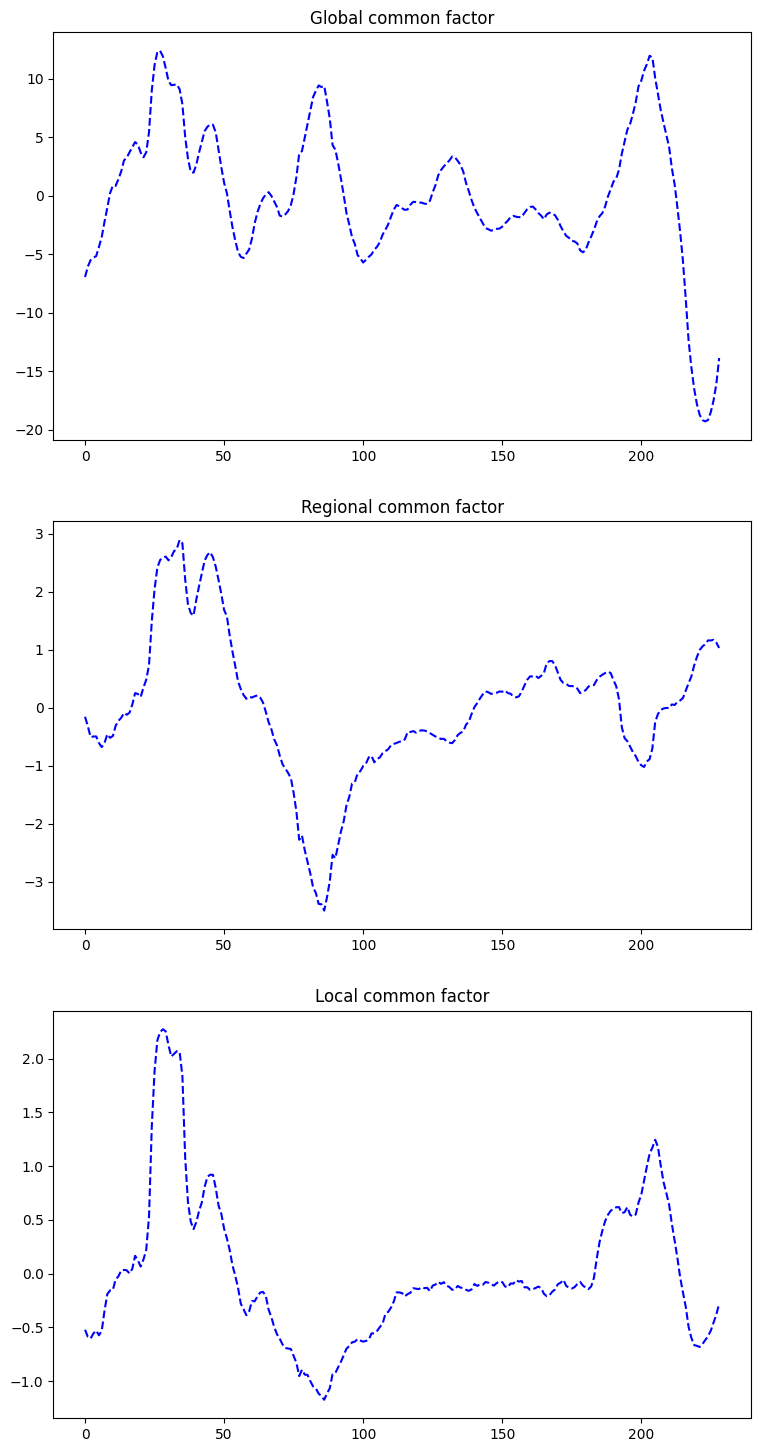

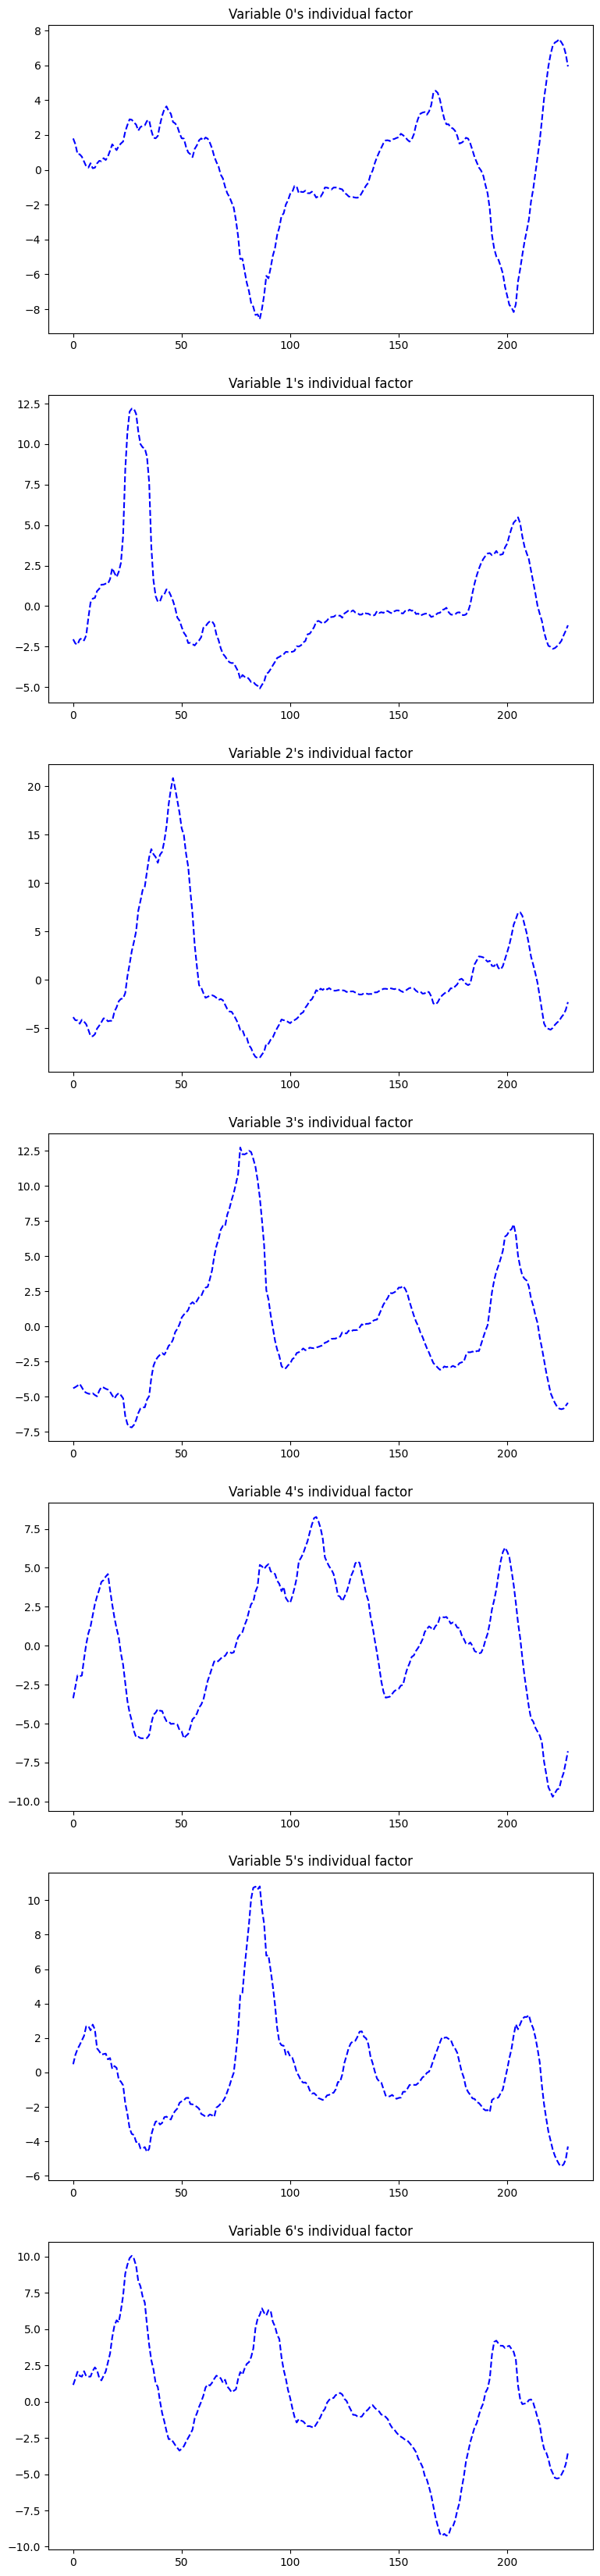

In [6]:
Global_factor, Regional_factor, Local_factor, Individual_factors, Table_Var_Decomp, Table_Common_AR, Table_Common_Var, Table_Idio_AR, Table_Idio_Var, Table_Global_factorloading, Table_Regional_factorloading, Table_Local_factorloading, lnL, BIC = bp.SSM_DFM_model(Data, Regional_countries, Local_countries, P)
# Global_factor = 글로벌 요인 추정치, T by 1
# Regional_factor = Regional 요인 추정치, T by 1
# Local_factor = Local 요인 추정치, T by 1
# Individual_factors = 변수 특유 요인, T by N
# Table_Var_Decomp = 분산분해 결과
# Table_Common_AR = 공통요인의 AR 계수 추정치와 표준오차. 만약 P = 0이면 Table_Common_AR은 empty
# Table_Common_Var = 공통요인 충격의 분산 추정치와 표준오차
# Table_Idio_AR = 특유 요인의 AR 계수 추정치와 표준오차, N by 2. 만약 P = 0이면 Table_Idio_AR은 empty
# Table_Idio_Var = 특유 요인 충격의 분산 추정치와 표준오차, N by 2
# Table_Global_factorloading = 글로벌 요인 팩터로딩, N by 2
# Table_Regional_factorloading = Regional 요인 팩터로딩, N by 2
# Table_Local_factorloading = Local 요인 팩터로딩, N by 2
# lnL = 로그우도
# BIC = 베이지안 정보기준
# 입력된 자료의 평균을 제거하고, 평균이 제거된 자료를 사용하여 추정합니다. 따라서 추정된 요인들은 모두 0 주위에서 움직입니다.

In [7]:
Table_Var_Decomp # 분산분해 결과

,글로벌 요인,Regional 요인,Local 요인,개별 요인
변수 1,56.8,8.9,0.0,34.3
변수 2,36.5,3.5,9.2,50.8
변수 3,25.3,3.4,1.0,70.3
변수 4,23.4,0.0,0.0,76.6
변수 5,22.9,0.0,0.0,77.1
변수 6,29.0,0.0,0.0,71.0
변수 7,27.1,0.0,0.0,72.9


In [8]:
Table_Common_AR # 공통요인의 AR 계수 추정치와 표준오차

,추정치,표준편차
글로벌 요인,0.825699,0.064
Regional 요인,0.825427,0.065
Local 요인,0.802659,0.062


In [9]:
Table_Common_Var # 공통요인 충격의 분산 추정치와 표준오차

,추정치,표준편차
글로벌 요인,6.031,7.404
Regional 요인,0.946,2.468
Local 요인,0.798,0.097


In [10]:
Table_Idio_AR # 특유 요인의 AR 계수 추정치와 표준오차

,추정치,표준편차
변수 1,0.853308,0.111
변수 2,0.826042,0.015
변수 3,0.808111,0.041
변수 4,0.837110,0.027
변수 5,0.835159,0.023
변수 6,0.816016,0.011
변수 7,0.842566,0.022


In [11]:
Table_Idio_Var # 특유 요인 충격의 분산 추정치와 표준오차

,추정치,표준편차
변수 1,3.106,4.710
변수 2,3.929,1.105
변수 3,6.392,0.660
변수 4,2.350,0.425
변수 5,1.773,0.257
변수 6,1.324,0.194
변수 7,2.464,0.511


In [12]:
Table_Global_factorloading # 글로벌 요인 팩터로딩

,추정치,표준편차
변수 1,1.000,0.000
변수 2,0.685,0.455
변수 3,0.592,0.305
변수 4,0.356,0.202
변수 5,0.303,0.178
변수 6,0.292,0.153
변수 7,0.409,0.343


In [13]:
Table_Regional_factorloading # Regional 요인 팩터로딩

,추정치,표준편차
변수 1,1.000,0.000
변수 2,0.536,0.625
변수 3,0.550,0.534
변수 4,0.000,0.000
변수 5,0.000,0.000
변수 6,0.000,0.000
변수 7,0.000,0.000


In [14]:
Table_Local_factorloading # Local 요인 팩터로딩

,추정치,표준편차
변수 1,0.000,0.000
변수 2,1.000,0.000
변수 3,0.346,0.211
변수 4,0.000,0.000
변수 5,0.000,0.000
변수 6,0.000,0.000
변수 7,0.000,0.000
